### Ogólne wprowadzenie

###### UWAGA:
Algorytm działa prawidłowo wyłącznie, gdy wszystkie wagi krawędzi są nieujemne.
###### UWAGA:
Algorytm Dijkstry służy do znalezienia najkrótszych ścieżek z jednego wierzchołka do wszystkich innych. Jeżeli interesuje nas znalezienie jednej konkretnej najkrótszej ścieżki (między parą wskazanych wierzchołków), możemy albo przerwać algorytm Dijkstry po dotarciu do celu, albo użyć odpowiedni do tego celu algorytm, wyznaczający najkrótszą/najtańszą/najszybszą ścieżkę pomiędzy dwoma wierzchołkami.
###### UWAGA:
Algorytm Dijkstry działa prawidłowo zarówno dla grafów nieskierowanych, jak i skierowanych. W poniższych implementacjach (głównie dodatkowych funkcji, które odtwarzają ścieżki), zakładam, że graf jest nieskierowany. Z tego względu np. wyznaczam ścieżkę między wierzchołkiem początkowym a końcowym w odwrotnej kolejności (zaczynając od końca), ponieważ wtedy nie musimy odwracać kolejności listy kolejno odwiedzanych krawędzi/wierzchołków (wynika to stąd, że drzewo rodziców jest grafem skierowanym, którego krawędzie prowadzą w kierunku przeciwnym do tego, w którym się poruszaliśmy). Aby funkcje te zadziałały na grafach skierowanych, wystarczy normalnie znaleźć ścieżki od wierzchołka początkowego do końcowego, a następnie odwrócić kolejność wierzchołków/krawędzi ze ścieżki.

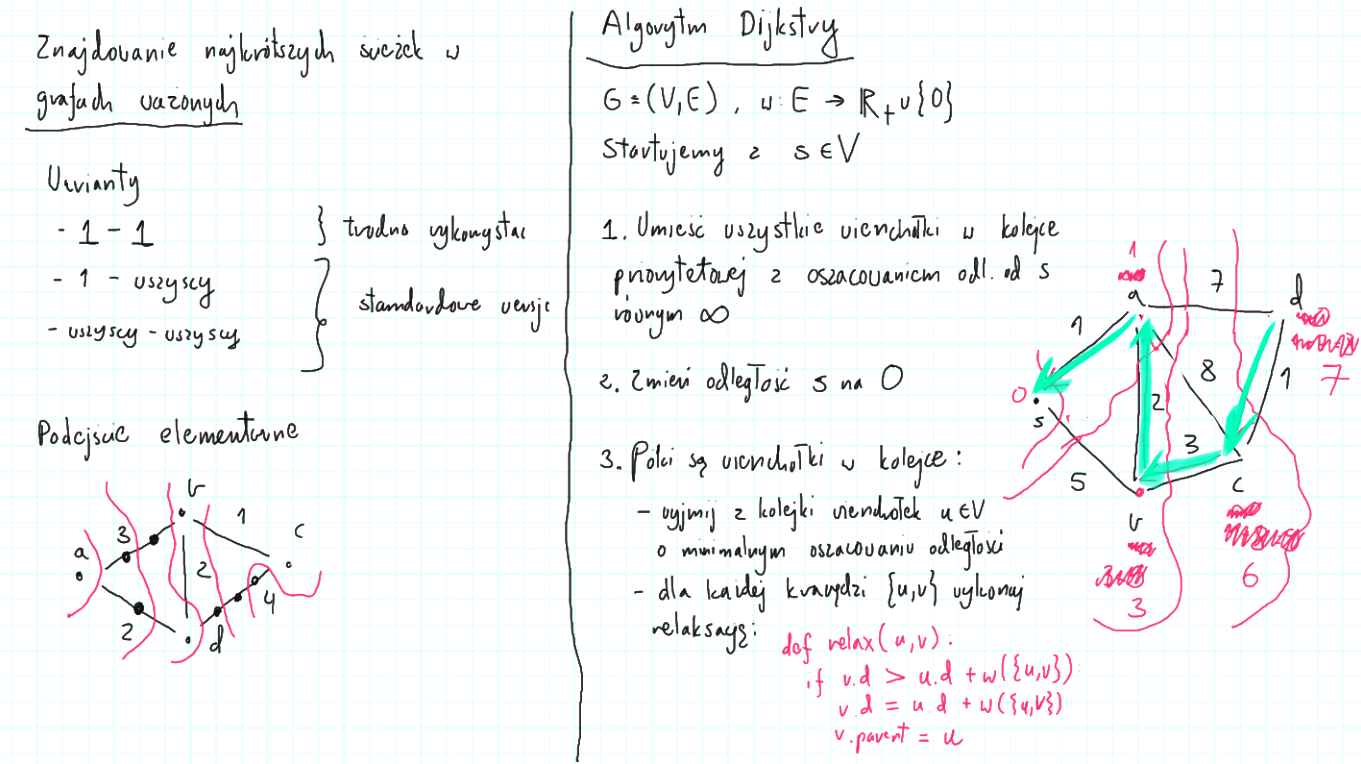

# Dla listowej reprezentacji grafu

### Implementacja #1 (Gorsza)
#### (Wersja z wykładu - wielokrotna relaksacja - znajduje ścieżki do wszystkich)
##### (Dla reprezentacji grafu w postaci list sąsiedztwa)

#### Uwagi:

Poniższy algorytm jest podstawową implementacją algorytmu Dijkstry. Algorytm da się zaimplementować lepiej, także bez indeksowanej kolejki priorytetowej, co pokażemy niżej. Ta implementacja znajduje najkrótsze ścieżki ze wskazanego wierzchołka $ s $ do wszystkich innych.

#### Złożoność:

$ O(E \cdot log(V)) $ - ponieważ algorytm Dijkstry jest tak naprawdę nieco przerobioną wersją algorytmu Prima (bo w kolejce będzie maksymalnie $ E $ elementów, bo tyle mamy krawędzi)

##### Kod:

In [1]:
from queue import PriorityQueue


def dijkstra(G: 'graph represented by adjacency lists', s: 'source'):
    n = len(G)
    inf = float('inf')
    parents = [None] * n
    weights = [inf] * n
    pq = PriorityQueue()
    weights[s] = 0
    pq.put((0, s))
    
    while not pq.empty():
        # Poll the vertex with the shortest total distance
        _, u = pq.get()
        for v, weight in G[u]:
            # If there is a path of the lower total weight,
            # relax a v vertex
            if weights[u] + weight < weights[v]:
                weights[v] = weights[u] + weight
                parents[v] = u
                pq.put((weights[v], v))
                
    return parents, weights


"""Dodatkowo: Tworzenie drzewa najkrótszych ścieżek"""
def create_shortest_paths_tree(G: 'graph represented by adjacency lists', s: 'source'):
    n = len(G)
    parents, weights = dijkstra(G, s)
    G = [[] for _ in range(n)]
    
    for u in range(n):
        if parents[u] is None: continue
        G[parents[u]].append((u, weights[u]))
        G[u].append((parents[u], weights[u]))
        
    return G


"""Dodatkowo: Wyznaczanie najkrótszej scieżki między parą wierzchołków
(w postaci listy kolejno odwiedzanych wierzchołków - tylko dla grafów bez krawędzi wielokrotnych)
"""
def get_shortest_path(G: 'graph represented by adjacency lists', s: 'source', t: 'target'):
    n = len(G)
    parents, _ = dijkstra(G, t)
    path = []
    
    while s is not None:
        path.append(s)
        s = parents[s]
        
    return path


"""Dodatkowo: Wyznaczanie najkrótszej scieżki między parą wierzchołków
(w postaci listy kolejno przebytych krawędzi)
"""
def get_shortest_path_edges(G: 'graph represented by adjacency lists', s: 'source', t: 'target'):
    n = len(G)
    parents, weights = dijkstra(G, t)
    path = []
    
    while parents[s] is not None:
        path.append((s, parents[s], weights[s] - weights[parents[s]]))
        s = parents[s]
        
    return path

###### Kilka testów:

##### Pomocnicze:

In [2]:
def undirected_weighted_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append((e[1], e[2]))
        G[e[1]].append((e[0], e[2]))
    return G

##### Testy:

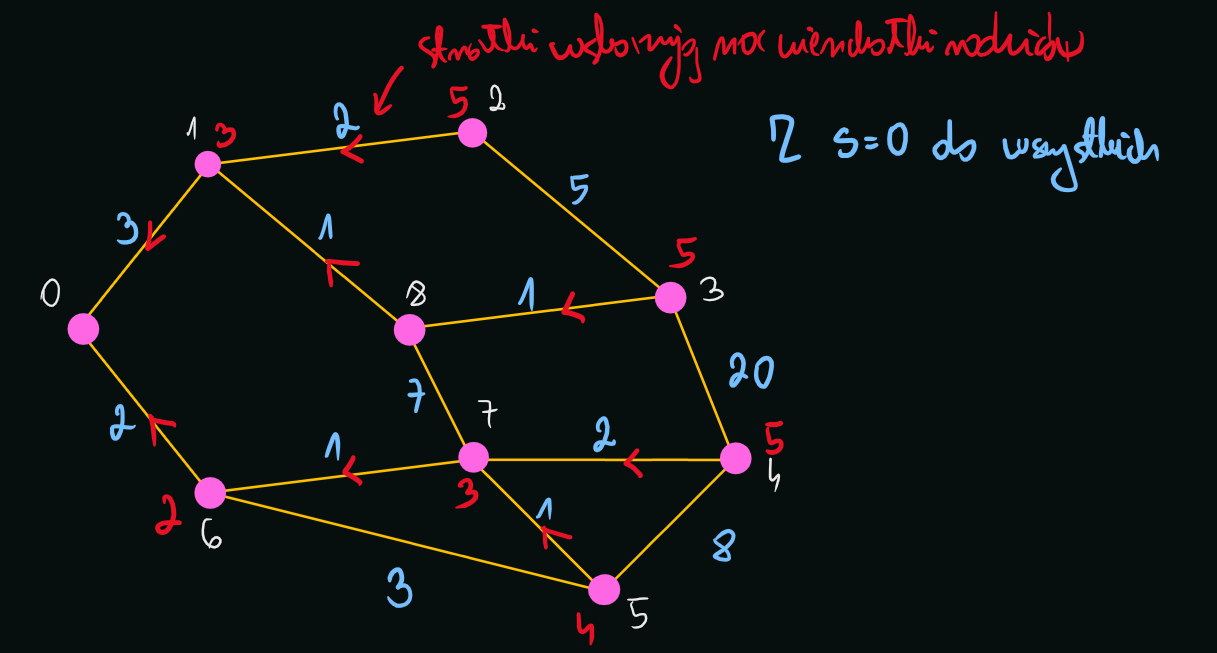

In [3]:
G = undirected_weighted_graph_list([(0, 1, 3), (1, 2, 2), (0, 6, 2), (6, 7, 1), (6, 5, 3), (5, 7, 1),
                                    (5, 4, 8), (3, 4, 20), (8, 7, 7), (8, 1, 1), (2, 3, 5), (3, 8, 1),
                                    (7, 4, 2)])
s = 0
print(*G, sep='\n')
print(dijkstra(G, s))

[(1, 3), (6, 2)]
[(0, 3), (2, 2), (8, 1)]
[(1, 2), (3, 5)]
[(4, 20), (2, 5), (8, 1)]
[(5, 8), (3, 20), (7, 2)]
[(6, 3), (7, 1), (4, 8)]
[(0, 2), (7, 1), (5, 3)]
[(6, 1), (5, 1), (8, 7), (4, 2)]
[(7, 7), (1, 1), (3, 1)]
([None, 0, 1, 8, 7, 7, 0, 6, 1], [0, 3, 5, 5, 5, 4, 2, 3, 4])


In [4]:
# UWAGA: Jeżeli chcemy znaleźć graf najkrótszych ścieżek z każdego wierzchołka, do jakiegoś celu,
# zamiast wierzchołka początkowego, przekazujemy funkcji w drugim argumencie wierzchołek docelowy
print(*create_shortest_paths_tree(G, 0), sep='\n')

[(1, 3), (6, 2)]
[(0, 3), (2, 5), (8, 4)]
[(1, 5)]
[(8, 5)]
[(7, 5)]
[(7, 4)]
[(0, 2), (7, 3)]
[(4, 5), (5, 4), (6, 3)]
[(3, 5), (1, 4)]


In [5]:
print(get_shortest_path(G, 4, 0))

[4, 7, 6, 0]


In [6]:
print(get_shortest_path_edges(G, 4, 0))

[(4, 7, 2), (7, 6, 1), (6, 0, 2)]


### Implementacja #2 (Lepsza)
#### (Wersja z BIT Algo - jednokrotna relaksacja - znajduje ścieżki do wszystkich)
##### (Dla reprezentacji grafu w postaci list sąsiedztwa)

#### Uwagi:

Poniższy algorytm jest nieco ulepszoną i uproszczoną implementacją algorytmu Dijkstry, przedstawionego wyżej. Sposób działania opiera się na zawuażeniu tego faktu, iż wierzchołek wyjęty z najniższą wagą zawsze w momencie jego wyjęcia z kolejki priorytetowej będzie najlepszym rezultatem (będzie odpowiadał ścieżce o najmniejszej sumarycznej wadze) spośród wszystkich występujących w kolejce ścieżek. Zatem od razu możemy dokonać relaksacji tego wierzchołka i już nigdy więcej go nie sprawdzać. Z tego powodu, zamiast patrzeć na wszystkich sąsiadów danego wierzchołka za każdym razem, patrzymy tylko skąd przyszliśmy do danego wierzchołka ścieżką o najniższym koszcie. Wówczas zapisujemy ten koszt oraz rodzica, którego również zdjęliśmy z kolejki (nie możemy trzymać w tablicy, bo do danego wierzchołka $ u $ mogliśmy wejść z różnymi sumarycznymi wagami z kilku wierzchołków, więc zapisany rodzic nie byłby prawidłowy). Po zapisaniu rodzica i wagi (sumarycznej długości ścieżki ze wskazanego wierzchołka początkowego $ s $ z bieżącego wierzchołka $ u $), zmniejszamy licznik pozostałych do zrelaksowania wierzchołków o 1, ponieważ obecnie przetworzony wierzchołek ma już zapisaną najmniejszą możliwą wartość $ weights[u] $, więc nigdy więcej go nie odwiedzimy, tzn. ten warunek wykona się tylko raz:

    if min_w < weights[u]:
        ...

Pozwala nam to nie tylko uprościć implementację, ale również przerwać ją zanim ściągniemy wszystkie (przetworzone wcześniej) wierzchołki, pozostałe w kolejce priorytetowej. (Bo nie ma już sensu szukać dla nich najkrótszych ścieżek, ponieważ są one znalezione). Zatem po zrelaksowaniu ostatniego nieprzetworzonego (niezrelaksowanego) wcześniej wierzchołka, pętla zostanie przerwana i zwrócimy rezultat.

#### Złożoność:

$ O(E \cdot log(V)) $ - ponieważ algorytm Dijkstry jest tak naprawdę nieco przerobioną wersją algorytmu Prima (bo w kolejce będzie maksymalnie $ E $ elementów, bo tyle mamy krawędzi)

##### Kod:

#### Wersja #1 - tylko wyznaczanie sumarycznych wag/długości najkrótszych ścieżek:

In [7]:
from queue import PriorityQueue


def dijkstra(G: 'graph represented by adjacency lists', s: 'source'):
    n = len(G)
    inf = float('inf')
    weights = [inf] * n
    # This variable is a counter of vertices remaining which we still
    # have to find shortest paths to
    to_relax = n
    pq = PriorityQueue()
    pq.put((0, s))

    while not pq.empty() and to_relax:
        min_w, u = pq.get()
        # We will find the minimum total weight path only once so the
        # code below this if statement will be executed only once
        if min_w < weights[u]:
            weights[u] = min_w
            to_relax -= 1
            # Add all the neighbours of the u vertex to the priority queue
            for v, weight in G[u]:
                if weights[v] == inf:
                    pq.put((weights[u] + weight, v))
                
    return weights

###### Kilka testów

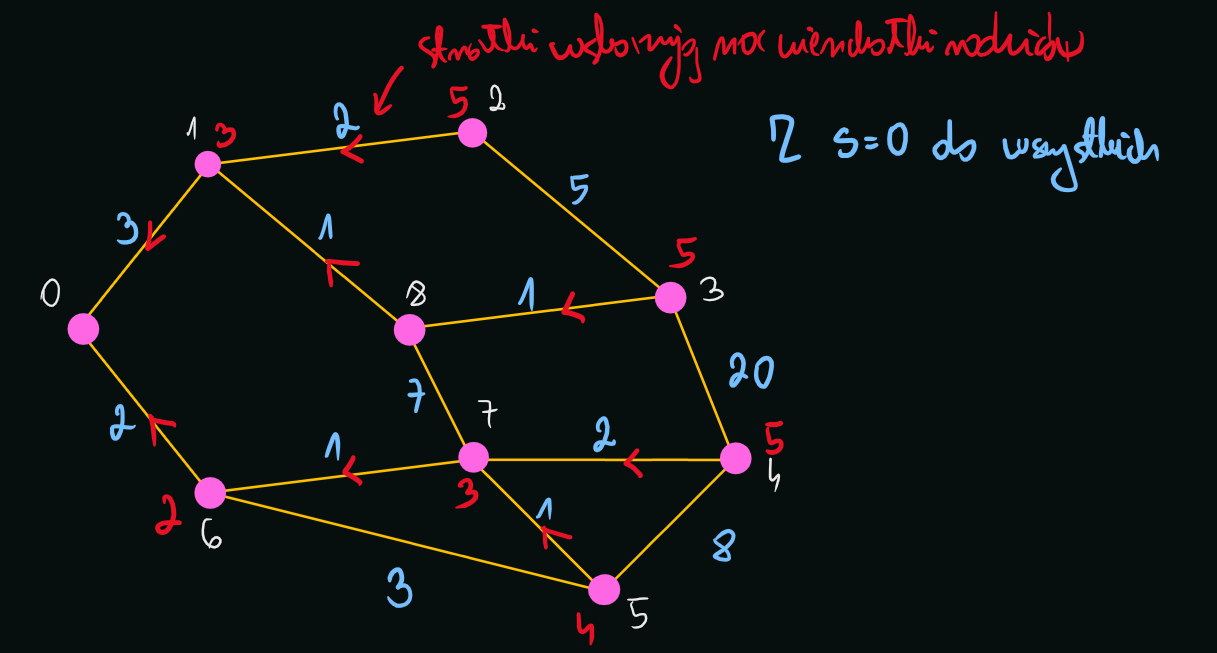

In [8]:
G = undirected_weighted_graph_list([(0, 1, 3), (1, 2, 2), (0, 6, 2), (6, 7, 1), (6, 5, 3), (5, 7, 1),
                                    (5, 4, 8), (3, 4, 20), (8, 7, 7), (8, 1, 1), (2, 3, 5), (3, 8, 1),
                                    (7, 4, 2)])
s = 0
print(*G, sep='\n')
print(dijkstra(G, s))

[(1, 3), (6, 2)]
[(0, 3), (2, 2), (8, 1)]
[(1, 2), (3, 5)]
[(4, 20), (2, 5), (8, 1)]
[(5, 8), (3, 20), (7, 2)]
[(6, 3), (7, 1), (4, 8)]
[(0, 2), (7, 1), (5, 3)]
[(6, 1), (5, 1), (8, 7), (4, 2)]
[(7, 7), (1, 1), (3, 1)]
[0, 3, 5, 5, 5, 4, 2, 3, 4]


#### Wersja #2 - wyznaczanie wag oraz rodziców wierzchołków

In [9]:
from queue import PriorityQueue


def dijkstra(G: 'graph represented by adjacency lists', s: 'source'):
    n = len(G)
    inf = float('inf')
    weights = [inf] * n
    parents = [None] * n
    # This variable is a counter of vertices remaining which we still
    # have to find shortest paths to
    to_relax = n
    pq = PriorityQueue()
    pq.put((0, s, None))

    while not pq.empty() and to_relax:
        min_w, u, parent = pq.get()
        # We will find the minimum total weight path only once so the
        # code below this if statement will be executed only once
        if min_w < weights[u]:
            weights[u] = min_w
            parents[u] = parent
            to_relax -= 1
            # Add all the neighbours of the u vertex to the priority queue
            for v, weight in G[u]:
                if weights[v] == inf:
                    pq.put((weights[u] + weight, v, u))
                
    return parents, weights

##### Testy:

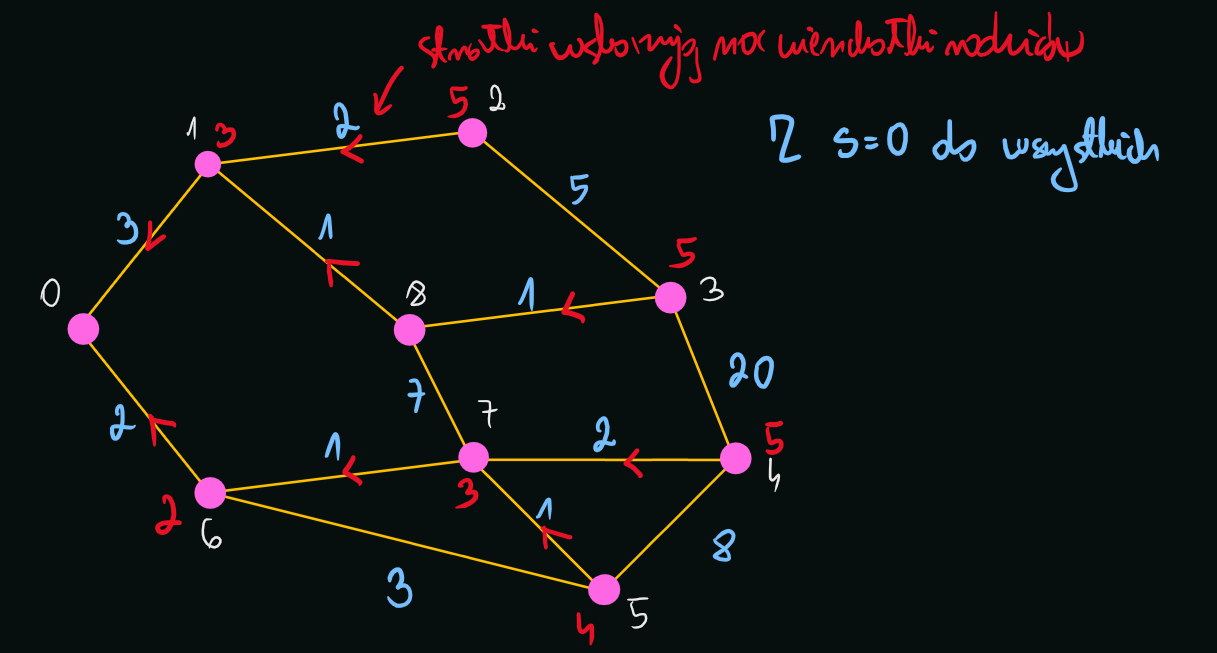

In [10]:
G = undirected_weighted_graph_list([(0, 1, 3), (1, 2, 2), (0, 6, 2), (6, 7, 1), (6, 5, 3), (5, 7, 1),
                                    (5, 4, 8), (3, 4, 20), (8, 7, 7), (8, 1, 1), (2, 3, 5), (3, 8, 1),
                                    (7, 4, 2)])
s = 0
print(*G, sep='\n')
print(dijkstra(G, s))

[(1, 3), (6, 2)]
[(0, 3), (2, 2), (8, 1)]
[(1, 2), (3, 5)]
[(4, 20), (2, 5), (8, 1)]
[(5, 8), (3, 20), (7, 2)]
[(6, 3), (7, 1), (4, 8)]
[(0, 2), (7, 1), (5, 3)]
[(6, 1), (5, 1), (8, 7), (4, 2)]
[(7, 7), (1, 1), (3, 1)]
([None, 0, 1, 8, 7, 7, 0, 6, 1], [0, 3, 5, 5, 5, 4, 2, 3, 4])


Ponieważ powyższa implementacja algorytmu Dijkstry zwraca takie same wartości, jak pierwsza implementacja wyżej, możemy użyć zaimplementowanych tam funkcji (które działają w tym przypadku identycznie, więc ich nie wklejam osobno do tej implementacji):

In [11]:
# UWAGA: Jeżeli chcemy znaleźć graf najkrótszych ścieżek z każdego wierzchołka, do jakiegoś celu,
# zamiast wierzchołka początkowego, przekazujemy funkcji w drugim argumencie wierzchołek docelowy
print(*create_shortest_paths_tree(G, 0), sep='\n')

[(1, 3), (6, 2)]
[(0, 3), (2, 5), (8, 4)]
[(1, 5)]
[(8, 5)]
[(7, 5)]
[(7, 4)]
[(0, 2), (7, 3)]
[(4, 5), (5, 4), (6, 3)]
[(3, 5), (1, 4)]


In [12]:
print(get_shortest_path(G, 4, 0))

[4, 7, 6, 0]


In [13]:
print(get_shortest_path_edges(G, 4, 0))

[(4, 7, 2), (7, 6, 1), (6, 0, 2)]


#### Wersja #3 - wyznaczanie jednej ścieżki od źródła do celu oraz jej wagi

Ta implementacja różni się od powyższej jedynie tym, że nie zliczamy już przetworzonych wierzchołków, a jedynie po relaksacji wierzchołka docelowego, przerywamy działanie algorytmu, bo oznacza to, że znaleźliśmy już najkrótszą ścieżkę do danego wierzchołka docelowego ze wskazanego początku.

In [14]:
from queue import PriorityQueue


def dijkstra(G: 'graph represented by adjacency lists', s: 'source', t: 'target'):
    n = len(G)
    inf = float('inf')
    weights = [inf] * n
    parents = [None] * n
    pq = PriorityQueue()
    pq.put((0, s, None))

    while not pq.empty():
        min_w, u, parent = pq.get()
        # We will find the minimum total weight path only once so the
        # code below this if statement will be executed only once
        if min_w < weights[u]:
            weights[u] = min_w
            parents[u] = parent
            # Break a loop if we found a shortest path to the specified
            # target
            if u == t: break
            # Add all the neighbours of the u vertex to the priority queue
            for v, weight in G[u]:
                if weights[v] == inf:
                    pq.put((weights[u] + weight, v, u))
                
    return parents, weights


"""Dodatkowo: Wyznaczanie najkrótszej scieżki między parą wierzchołków
(w postaci listy kolejno odwiedzanych wierzchołków - tylko dla grafów bez krawędzi wielokrotnych)
"""
def get_shortest_path(G: 'graph represented by adjacency lists', s: 'source', t: 'target'):
    n = len(G)
    parents, _ = dijkstra(G, t, s)
    path = []
    
    while s is not None:
        path.append(s)
        s = parents[s]
        
    return path


"""Dodatkowo: Wyznaczanie najkrótszej scieżki między parą wierzchołków
(w postaci listy kolejno przebytych krawędzi)
"""
def get_shortest_path_edges(G: 'graph represented by adjacency lists', s: 'source', t: 'target'):
    n = len(G)
    parents, weights = dijkstra(G, t, s)
    path = []
    
    while parents[s] is not None:
        path.append((s, parents[s], weights[s] - weights[parents[s]]))
        s = parents[s]
        
    return path

##### Testy:

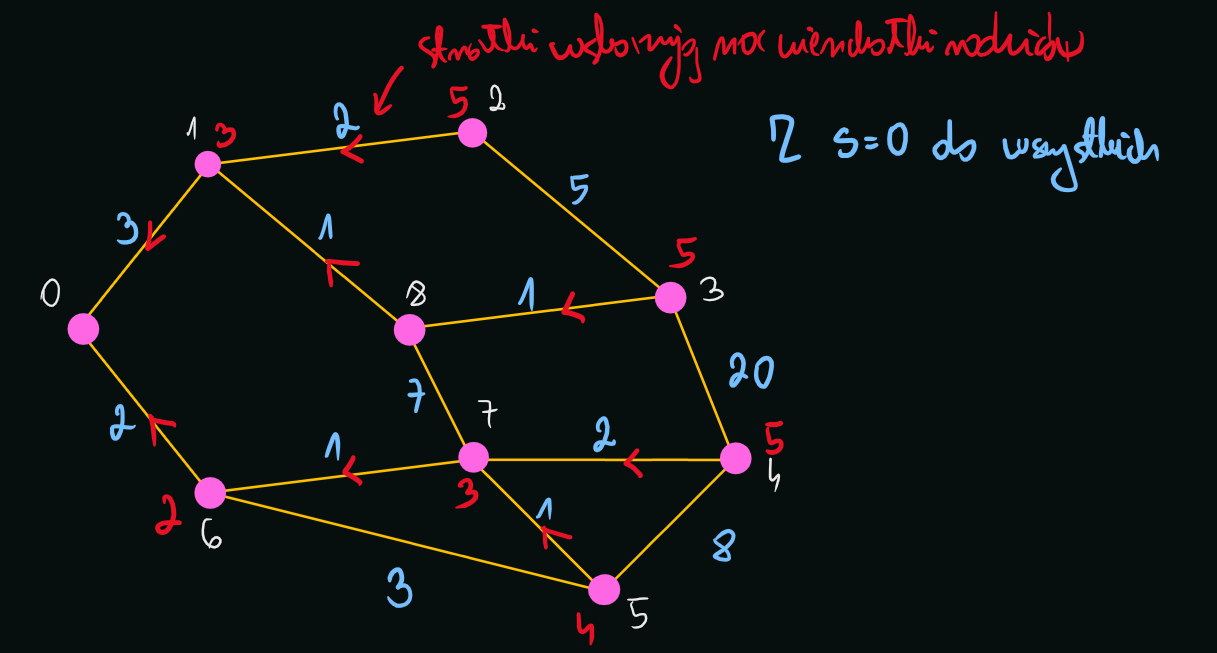

Jak można zauważyć, algorytm został przerwany przed wypełnieniem całej tablicy parentów oraz wag.

In [15]:
G = undirected_weighted_graph_list([(0, 1, 3), (1, 2, 2), (0, 6, 2), (6, 7, 1), (6, 5, 3), (5, 7, 1),
                                    (5, 4, 8), (3, 4, 20), (8, 7, 7), (8, 1, 1), (2, 3, 5), (3, 8, 1),
                                    (7, 4, 2)])
s = 0
t = 3
print(*G, sep='\n')
print(dijkstra(G, s, t))

[(1, 3), (6, 2)]
[(0, 3), (2, 2), (8, 1)]
[(1, 2), (3, 5)]
[(4, 20), (2, 5), (8, 1)]
[(5, 8), (3, 20), (7, 2)]
[(6, 3), (7, 1), (4, 8)]
[(0, 2), (7, 1), (5, 3)]
[(6, 1), (5, 1), (8, 7), (4, 2)]
[(7, 7), (1, 1), (3, 1)]
([None, 0, 1, 8, None, 7, 0, 6, 1], [0, 3, 5, 5, inf, 4, 2, 3, 4])


In [16]:
print(get_shortest_path(G, 3, 0))
print(get_shortest_path(G, 4, 0))
print(get_shortest_path(G, 8, 0))

[3, 8, 1, 0]
[4, 7, 6, 0]
[8, 1, 0]


In [17]:
print(get_shortest_path_edges(G, 3, 0))
print(get_shortest_path_edges(G, 4, 0))

[(3, 8, 1), (8, 1, 1), (1, 0, 3)]
[(4, 7, 2), (7, 6, 1), (6, 0, 2)]


# Dla macierzowej reprezentacji grafu <span id="dijkstra-matrix"></span>

### Implementacja #1 (Sprytna)
#### (Bez używania kolejki)
##### (Dla reprezentacji grafu w postaci macierzy sąsiedztwa)

#### Uwagi:

Ta implementacja ma jedynie sens dla reprezentacji grafu, przy pomocy macierzy, ponieważ wówczas i tak nie zejdziemy ze złożonością poniżej $ O(V^2) $, dlatego że przejrzenie całej macierzy i tak jest konieczne, a w przypadku tego algorytmu przejrzymy całą macierz tylko jeden raz, przy czym zajmiemy dokładnie $ O(V) $ pamięci, więc nigdy nie będziemy trzymać niepotrzebnych par $ (waga\_ścieżki, wierzchołek) $, jak miało to miejsce w przypadku implementacji algorytmu z użyciem kolejki priorytetowej (nieindeksowanej).
###### Na czym polega algorytm?
W zasadzie sposób działania algorytmu opiera się na tym, jak działa algorytm Dijkstry. Ustawiamy początkowo sumaryczne wagi ścieżek do wszystkich wierzchołków na $ \infty $, a jako wagę dla wierzchołka startowego na $ 0 $. Następnie, dopóki w grafie znajduje się jakiś nieprzetworzony wierzchołek, wybieramy nieprzetworzony wierzchołek o najmniejszej sumarycznej wadze (podobnie jak w poprzednich implementacjach, ale nie musimy już się martwić o to, czy przypadkiem nie wzięliśmy danego wierzchołka po raz kolejny, ponieważ zawsze wybierzemy dokładnie jeden nieprzetworzony wcześniej wierzchołek). Jak można zauważyć, już w tym przypadku mamy złożoność $ O(V^2) $, ale jest ona i tak najlepszą możliwą złożonością dla macierzowej reprezentacji grafu, a na plus jest to, że nie korzystamy z kolejki priorytetowej, która może zawierać wiele powtórek tego samego wierzchołka, przez co niepotrzebnie wzrosła by nam złożoność pamięciowa (i obliczeniowa, jeżeli graf jest gęsty, bo wtedy mielibyśmy w najgorszym przypadku $ E = V^2 \rightarrow O(E \cdot log(E)) = O(V^2 \cdot log(V^2)) = O(V^2 \cdot log(V)) \gt O(V^2) $, a omawiany tu algorytm gwarantuje nam złożoność $ O(V^2) $ zawsze (niezależnie od liczby krawędzi), dlatego jest on lepszy dla gęstych grafów. <br>
###### Trochę więcej szczegółów na temat samego algorytmu:
Po znalezieniu wierzchołka o najmniejszej sumarycznej wadze ścieżki, która do niego prowadzi, oznaczamy dany wierzchołek jako przetworzony i przeglądamy wszystkich jego sąsiadów, relaksując tych spośród nich, którzy jeszcze wcześniej nie byli przetworzeni (tego nie musimy akurat sprawdzać, bo jeżeli dany wierzchołek jest oznaczony jako przetworzony, wszystkie kolejne ścieżki do niego prowadzące, jakie znajdzemy później, będą miały tylko większe lub takie same sumaryczne wagi krawędzi) i znaleziona nowa ścieżka ma mniejszą wagę od poprzedniej. Jedyną operacją, jaką teraz robimy, jest relaksacja (i tyle) (możemy dodatkowo zapamiętywać rodziców). Nie ma żadnego wrzucania wierzchołków do kolejki, ani nic innego.
###### Źródła:
https://equilibriumofnothing.wordpress.com/2013/10/10/algorithm-dijkstra-without-a-priority-queue/

#### Złożoność:

$ O(V^2) $ - w przypadku grafów reprezentowanych macierzowo nigdy nie osiągniemy nic lepszego, gdy konieczne jest przejrzenie całego grafu.

##### Kod:

#### Wersja #1 - z przebieganiem po tablicy wszystkich wierzchołków w każdej pętli, podczas poszukiwania kolejnego wierzchołka do odwiedzenia
##### (Wyznacza wszystkie ścieżki ze źródła do innych wierzchołków)

In [18]:
def dijkstra(G: 'graph represented by adjacency matrix', s: 'source'):
    n = len(G)
    inf = float('inf')
    # Store information about vertices which we already found a shortest path to
    processed  = [False] * n
    parents    = [None] * n
    weights    = [inf] * n
    weights[s] = 0
    
    # Loop till there are some vertices which haven't been processed yet
    while True:
        # Find a vertex of the minimum total weight path
        min_w = inf
        min_u = None
        for u in range(n):
            if not processed[u] and weights[u] < min_w:
                min_w = weights[u]
                min_u = u
        # Check if a vertex was found (if not, all vertices must have
        # been processed before)        
        if min_u is None: break
        # Mark the current vertex as processed
        u = min_u
        processed[u] = True
        # Iterate over the vertice's neighbours and update weights of the paths
        for v in range(n):
            # Skip if no edge (-1 means not edge) or a vertex v was processed
            if G[u][v] == -1 or processed[v]: continue
            # Update the weight of a path to the vertex v if found a better one
            if weights[u] + G[u][v] < weights[v]:
                weights[v] = weights[u] + G[u][v]
                parents[v] = u
                
    return parents, weights

###### Kilka testów

##### Pomocnicze:

In [19]:
def undirected_weighted_graph_matrix(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[-1] * n for _ in range(n)]  # -1 means no edge
    for e in E:
        G[e[0]][e[1]] = e[2]
        G[e[1]][e[0]] = e[2]
    return G

##### Testy:

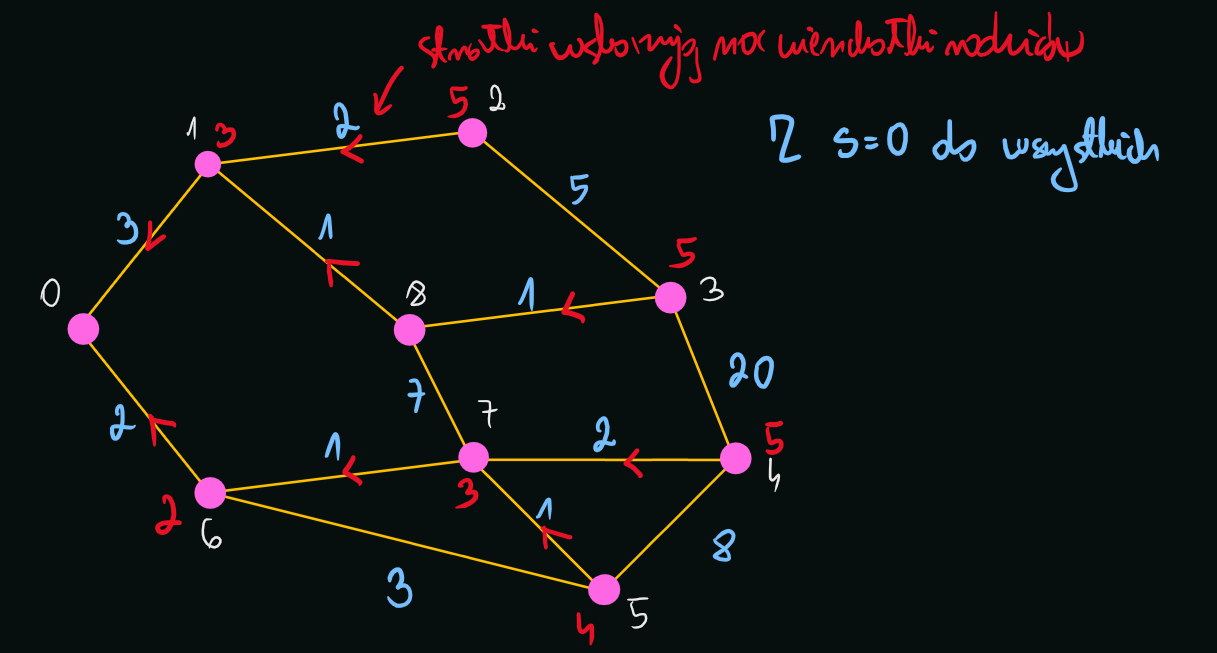

Jak można zauważyć, algorytm został przerwany przed wypełnieniem całej tablicy parentów oraz wag.

In [20]:
G = undirected_weighted_graph_matrix([(0, 1, 3), (1, 2, 2), (0, 6, 2), (6, 7, 1), (6, 5, 3), 
                                      (5, 7, 1), (5, 4, 8), (3, 4, 20), (8, 7, 7), (8, 1, 1), 
                                      (2, 3, 5), (3, 8, 1), (7, 4, 2)])
s = 0
print(*G, sep='\n')
print(dijkstra(G, s))

[-1, 3, -1, -1, -1, -1, 2, -1, -1]
[3, -1, 2, -1, -1, -1, -1, -1, 1]
[-1, 2, -1, 5, -1, -1, -1, -1, -1]
[-1, -1, 5, -1, 20, -1, -1, -1, 1]
[-1, -1, -1, 20, -1, 8, -1, 2, -1]
[-1, -1, -1, -1, 8, -1, 3, 1, -1]
[2, -1, -1, -1, -1, 3, -1, 1, -1]
[-1, -1, -1, -1, 2, 1, 1, -1, 7]
[-1, 1, -1, 1, -1, -1, -1, 7, -1]
([None, 0, 1, 8, 7, 7, 0, 6, 1], [0, 3, 5, 5, 5, 4, 2, 3, 4])


#### Wersja #2 - z użyciem listy odsyłaczowej do przechowywania pozostałych do przetworzenia wierzchołków
##### (Wyznacza wszystkie ścieżki ze źródła do innych wierzchołków)

In [21]:
class Node:
    def __init__(self, idx=None):
        self.idx  = idx
        self.next = None


def vertices_to_process_ll(n):
    head = Node()
    tail = head
    for i in range(n):
        tail.next = Node(i)
        tail = tail.next
    return head


def get_min_weight_vertex(head, weights):
    if not head.next: return None  # If no more vertices are remaining
    
    # Find a vertex of the lowest weight
    min_prev = head
    prev = head.next
    while prev.next:
        if weights[prev.next.idx] < weights[min_prev.next.idx]:
            min_prev = prev
        prev = prev.next
        
    # Remove a vertex found
    u = min_prev.next.idx
    min_prev.next = min_prev.next.next
    
    return u


def dijkstra(G: 'graph represented by adjacency matrix', s: 'source'):
    n = len(G)
    inf = float('inf')
    # Store information about vertices which haven't been processed yet
    to_process = vertices_to_process_ll(n)
    parents    = [None] * n
    weights    = [inf] * n
    weights[s] = 0
    
    # Loop till there are some vertices which haven't been processed yet
    while True:
        # Find a vertex of the minimum total weight path
        u = get_min_weight_vertex(to_process, weights)
        # Check if a vertex was found (if not, all vertices must have
        # been processed before)        
        if u is None: break
        # Iterate over the vertice's neighbours and update weights of the paths
        for v in range(n):
            # Skip if no edge (-1 means no edge) or a vertex v was processed
            if G[u][v] == -1: continue
            # Update the weight of a path to the vertex v if found a better one
            if weights[u] + G[u][v] < weights[v]:
                weights[v] = weights[u] + G[u][v]
                parents[v] = u
                
    return parents, weights

###### Kilka testów:

##### Testy:

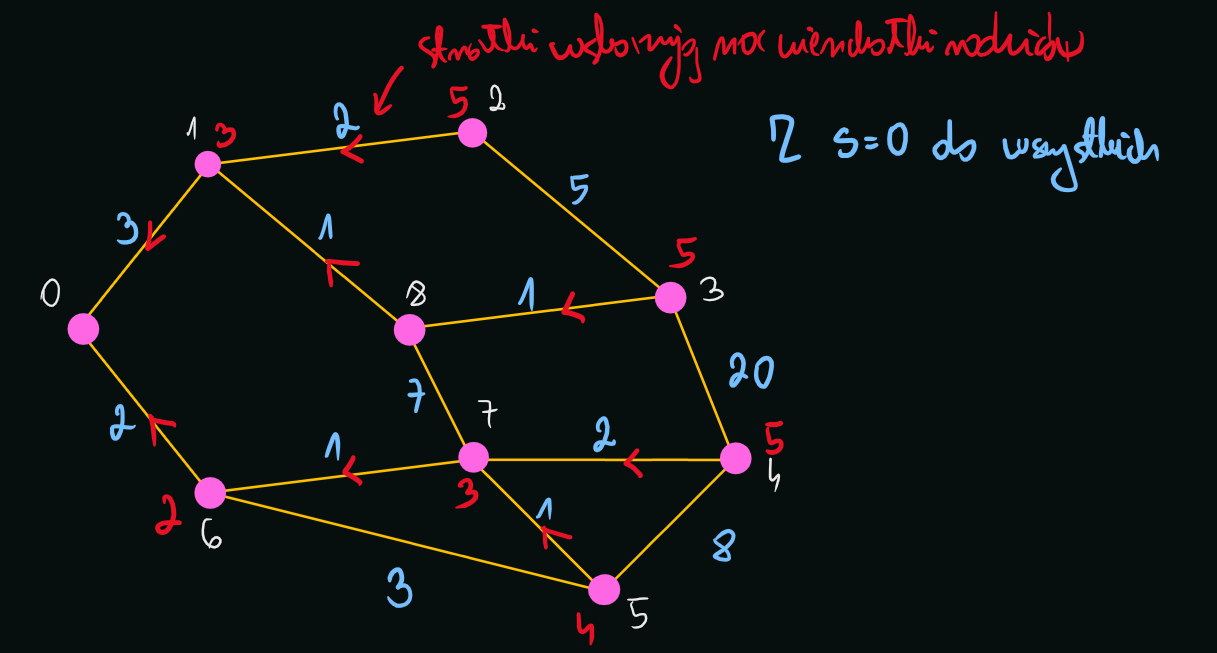

Jak można zauważyć, algorytm został przerwany przed wypełnieniem całej tablicy parentów oraz wag.

In [22]:
G = undirected_weighted_graph_matrix([(0, 1, 3), (1, 2, 2), (0, 6, 2), (6, 7, 1), (6, 5, 3), 
                                      (5, 7, 1), (5, 4, 8), (3, 4, 20), (8, 7, 7), (8, 1, 1), 
                                      (2, 3, 5), (3, 8, 1), (7, 4, 2)])
s = 0
print(*G, sep='\n')
print(dijkstra(G, s))

[-1, 3, -1, -1, -1, -1, 2, -1, -1]
[3, -1, 2, -1, -1, -1, -1, -1, 1]
[-1, 2, -1, 5, -1, -1, -1, -1, -1]
[-1, -1, 5, -1, 20, -1, -1, -1, 1]
[-1, -1, -1, 20, -1, 8, -1, 2, -1]
[-1, -1, -1, -1, 8, -1, 3, 1, -1]
[2, -1, -1, -1, -1, 3, -1, 1, -1]
[-1, -1, -1, -1, 2, 1, 1, -1, 7]
[-1, 1, -1, 1, -1, -1, -1, 7, -1]
([None, 0, 1, 8, 7, 7, 0, 6, 1], [0, 3, 5, 5, 5, 4, 2, 3, 4])


#### Wersja #3 - z użyciem listy odsyłaczowej do przechowywania pozostałych do przetworzenia wierzchołków
##### (Wyznacza tylko ścieżkę pomiędzy parą wskazanych wierzchołków)

In [23]:
class Node:
    def __init__(self, idx=None):
        self.idx  = idx
        self.next = None


def vertices_to_process_ll(n):
    head = Node()
    tail = head
    for i in range(n):
        tail.next = Node(i)
        tail = tail.next
    return head


def get_min_weight_vertex(head, weights):
    if not head.next: return None  # If no more vertices are remaining
    
    # Find a vertex of the lowest weight
    min_prev = head
    prev = head.next
    while prev.next:
        if weights[prev.next.idx] < weights[min_prev.next.idx]:
            min_prev = prev
        prev = prev.next
        
    # Remove a vertex found
    u = min_prev.next.idx
    min_prev.next = min_prev.next.next
    
    return u


def dijkstra(G: 'graph represented by adjacency matrix', s: 'source', t: 'target'):
    n = len(G)
    inf = float('inf')
    # Store information about vertices which haven't been processed yet
    to_process = vertices_to_process_ll(n)
    parents    = [None] * n
    weights    = [inf] * n
    weights[s] = 0
    
    # Loop till there are some vertices which haven't been processed yet
    while True:
        # Find a vertex of the minimum total weight path
        u = get_min_weight_vertex(to_process, weights)
        # Break if the next vertex to process is the target vertex as we have 
        # already found a shortest path to this vertex before
        if u == t: break
        # Iterate over the vertex's neighbours and update weights of the paths
        for v in range(n):
            # Skip if no edge (-1 means not edge)
            if G[u][v] == -1: continue
            # Update the weight of a path to the vertex v if found a better one
            if weights[u] + G[u][v] < weights[v]:
                weights[v] = weights[u] + G[u][v]
                parents[v] = u
                
    return parents, weights

##### Testy:

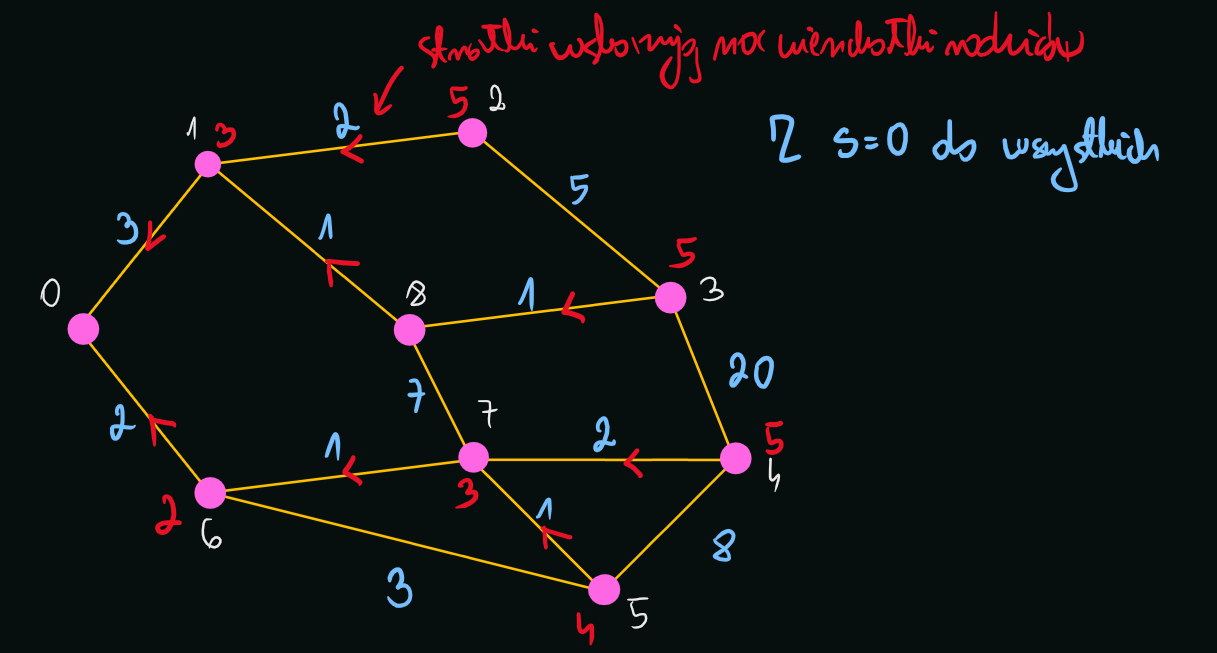

Jak można zauważyć, algorytm został przerwany przed wypełnieniem całej tablicy parentów oraz wag.

In [24]:
G = undirected_weighted_graph_matrix([(0, 1, 3), (1, 2, 2), (0, 6, 2), (6, 7, 1), (6, 5, 3), 
                                      (5, 7, 1), (5, 4, 8), (3, 4, 20), (8, 7, 7), (8, 1, 1), 
                                      (2, 3, 5), (3, 8, 1), (7, 4, 2)])
s = 0
t = 8
print(*G, sep='\n')
print(dijkstra(G, s, t))

[-1, 3, -1, -1, -1, -1, 2, -1, -1]
[3, -1, 2, -1, -1, -1, -1, -1, 1]
[-1, 2, -1, 5, -1, -1, -1, -1, -1]
[-1, -1, 5, -1, 20, -1, -1, -1, 1]
[-1, -1, -1, 20, -1, 8, -1, 2, -1]
[-1, -1, -1, -1, 8, -1, 3, 1, -1]
[2, -1, -1, -1, -1, 3, -1, 1, -1]
[-1, -1, -1, -1, 2, 1, 1, -1, 7]
[-1, 1, -1, 1, -1, -1, -1, 7, -1]
([None, 0, 1, None, 7, 7, 0, 6, 1], [0, 3, 5, inf, 5, 4, 2, 3, 4])


Ponownie możemy użyć tych samych funkcji, co wyżej.

In [25]:
print(get_shortest_path(G, 8, 0))
print(get_shortest_path(G, 0, 8))
print(get_shortest_path(G, 4, 0))
print(get_shortest_path(G, 0, 4))

[8, 1, 0]
[0, 1, 8]
[4, 7, 6, 0]
[0, 6, 7, 4]


In [26]:
print(get_shortest_path_edges(G, 3, 0))
print(get_shortest_path_edges(G, 4, 0))

[(3, 8, 1), (8, 1, 1), (1, 0, 3)]
[(4, 7, 2), (7, 6, 1), (6, 0, 2)]


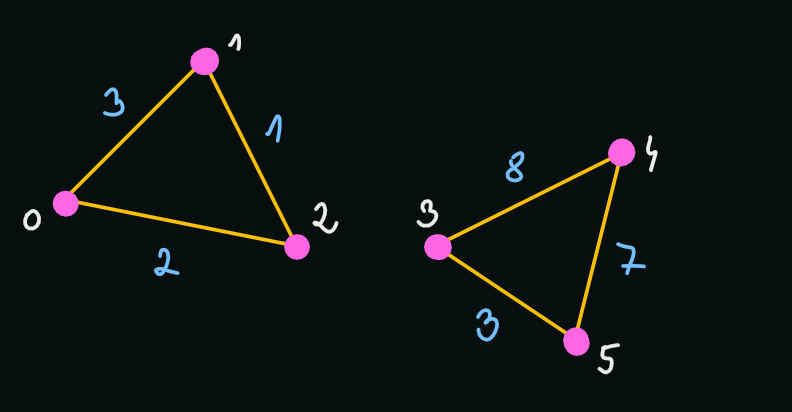

In [27]:
E = [(0, 1, 3), (1, 2, 1), (0, 2, 2), (3, 4, 8), (4, 5, 7), (3, 5, 3)]
G = undirected_weighted_graph_matrix(E)

print(dijkstra(G, 0, 4))

([None, 0, 0, None, None, None], [0, 3, 2, inf, inf, inf])
